In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import output_file
from RootInteractive.InteractiveDrawing.bokeh.bokehDrawSA import bokehDrawSA
from RootInteractive.InteractiveDrawing.bokeh.bokehTools import bokehDrawArray
from RootInteractive.Tools.pandaTools import initMetadata
import pandas as pd
import numpy as np
import math
import logging
import matplotlib
import matplotlib.pyplot as plt

/home/berki/Software/RootInteractive/RootInteractive/Tools/aliTreePlayer.py:582: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if name[0] is '#':
/home/berki/Software/RootInteractive/RootInteractive/Tools/aliTreePlayer.py:619: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if regExp.Match(keys.At(iKey).GetName()) is 0:
/home/berki/Software/RootInteractive/RootInteractive/Tools/aliTreePlayer.py:621: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if notReg.Match(keys.At(iKey).GetName()) is not 0:
/home/berki/Software/RootInteractive/RootInteractive/Tools/aliTreePlayer.py:625: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if treeBase.GetEntries() is 0:


x bokehVisJS3DGraph.ts
x HistogramCDS.ts
Import  CDSCompress.ts
Import  DownsamplerCDS.ts
Import  CDSAlias.ts
Import  CDSJoin.ts


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
df = pd.read_csv("output.csv")
initMetadata(df)

In [5]:
events = list(set(df.eventNr))
nEvents = len(events)
bitmask_events = [0] * nEvents
progress = 10
for i,event in enumerate(events):
    # Print progress just to make sure it is running
    if (i/nEvents > progress/100):
        print("Progress:",progress,"%")
        progress += 10
        
    alpides = set(df[df.eventNr == event].detector)
    if ("ALPIDE_0" in alpides): bitmask_events[i] += 0x1
    if ("ALPIDE_1" in alpides): bitmask_events[i] += 0x2
    if ("ALPIDE_2" in alpides): bitmask_events[i] += 0x4
    if ("ALPIDE_3" in alpides): bitmask_events[i] += 0x8
    if ("ALPIDE_4" in alpides): bitmask_events[i] += 0x10
        
event = -1
j=0
nRows = len(df.index)
bitmasks = [0]*nRows
bitmask_row = bitmask_events[j]

for row in range(nRows):
    if df["eventNr"][row] == event:
        bitmasks[row] = bitmask_row
    else:
        event = df["eventNr"][row]
        bitmask_row = bitmask_events[j]
        bitmasks[row] = bitmask_row
        j+=1
        
df["bitmask"] = bitmasks       

Progress: 10 %
Progress: 20 %
Progress: 30 %
Progress: 40 %
Progress: 50 %
Progress: 60 %
Progress: 70 %
Progress: 80 %
Progress: 90 %


In [91]:
df_events = df[df["bitmask"] == 31]
nEvents = len(set(df_events.eventNr))
eventLengths = []
alpide0lengths = []
alpide1lengths = []
alpide2lengths = []
alpide3lengths = []
alpide4lengths = []

for event in set(df_events.eventNr):
    event_df = df_events[df_events.eventNr == event]
    eventLengths.append(len(event_df.index))
    alpide0lengths.append(len(event_df[event_df["detector"] == "ALPIDE_0"].index)) 
    alpide1lengths.append(len(event_df[event_df["detector"] == "ALPIDE_1"].index)) 
    alpide2lengths.append(len(event_df[event_df["detector"] == "ALPIDE_2"].index)) 
    alpide3lengths.append(len(event_df[event_df["detector"] == "ALPIDE_3"].index)) 
    alpide4lengths.append(len(event_df[event_df["detector"] == "ALPIDE_4"].index)) 
    

(array([   0.,  305.,  236.,  273.,  499.,  860., 1227., 1467., 1579.,
        1572., 1245.,  997.,  714.,  532.,  329.,  207.,  109.,   93.,
          48.,   43.,   33.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <BarContainer object of 21 artists>)

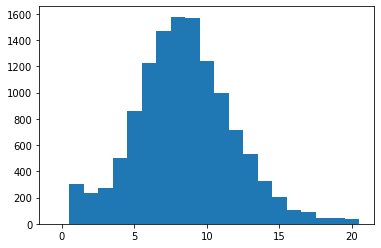

In [101]:
plt.hist(alpide2lengths,21,[-0.5,20.5])


AttributeError: Rectangle.set() got an unexpected keyword argument 'column'

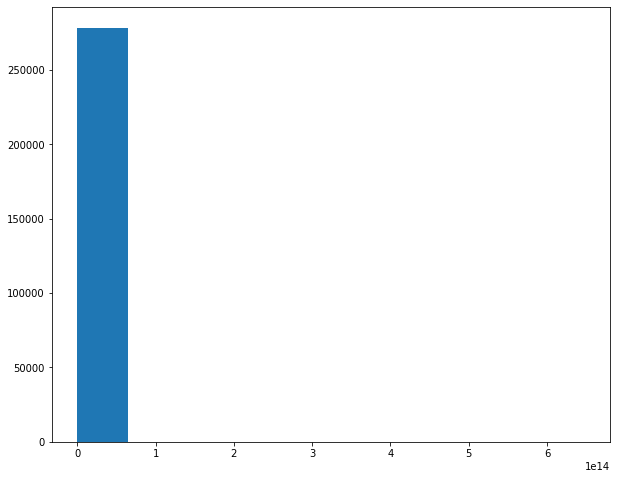

In [106]:
df_events.plot.hist(column="nPixels", by="detector", figsize=(10, 8))

In [4]:
df.head()

,eventNr,detector,localX,localY,globalX,globalY,globalZ,charge,split,nPixels,columnWidth,rowWidth,timeStamp
0,0,ALPIDE_0,5.21934,-6.06144,-6.06144,17.69300,29.5471,1,0,1,1,1,6.456710e+14
1,0,ALPIDE_0,12.09070,-5.52384,-5.52384,24.26610,27.5964,1,0,1,1,1,6.456710e+14
2,40,ALPIDE_4,8.99130,-5.57760,5.57760,21.35730,-28.6627,1,0,1,1,1,6.467850e+14
3,48,ALPIDE_1,-8.02053,0.95424,0.95424,-1.62207,22.6722,10,0,10,4,3,6.469990e+14
4,48,ALPIDE_2,-7.53196,3.01423,3.01423,-7.31407,16.4470,11,0,11,3,4,6.470000e+14


In [12]:
aliasArray = []

#axes = ["ALPIDE_0_X","ALPIDE_0_Y","ALPIDE_1_X","ALPIDE_1_Y","ALPIDE_2_X","ALPIDE_2_Y","ALPIDE_3_X","ALPIDE_3_Y","ALPIDE_4_X","ALPIDE_4_Y"]
#parameterArray = [
#    {"name": "first", "value":"ALPIDE_0_X", "options": axes},
#    {"name": "second", "value":"ALPIDE_0_Y", "options": axes}
#]

In [16]:
histoArray = [
        {"name": "hitmap", "variables": ["localX","localY"], "nbins":[100,100]},
        {"name": "hitmap3D", "variables": ["globalX","globalY","globalZ"], "nbins":[100,100,100]},
        #{"name": "correllation", "variables": ["first","second"], "nbins":[100,100]},
    ]

figureArray = [
    [[("bin_bottom_0", "bin_top_0")], [("bin_bottom_1", "bin_top_1")], {"colorZvar": "bin_count", "source":"hitmap"}],
    [['globalZ'], ['globalX'], {"color": "red", "size": 2, "colorZvar": "localY", "varZ": "globalY"}],
    [['bin_center_0'], ['bin_center_1'], {"color": "red", "size": 2, "colorZvar": "bin_count", "varZ": "bin_center_2", "source":"hitmap3D"}],
    
    #[[("bin_bottom_0", "bin_top_0")], [("bin_bottom_1", "bin_top_1")], {"colorZvar": "bin_count", "source":"correllation"}],
    {"size":2, "legend_options": {"label_text_font_size": "13px"}}
]

In [22]:
layout = {
    "Clusters": [[0,1,2]],
    #"Correlations": [[3]]
}

widgetParams=[
    ['range', ['localX']],
    ['range', ['localY']],
    ['multiSelect', ["detector"]],
    ['multiSelect',["bitmask"],{"name":"bitmask","mapping": {"ALPIDE_0": 0x1, "ALPIDE_1": 0x2, "ALPIDE_2": 0x4, "ALPIDE_3": 0x8, "ALPIDE_4": 0x10}, "how":"any", "title": "ALPIDEs in event"}],
    #['select', ["first"]],
    #['select', ["second"]],
]
widgetLayoutDesc={
    "Selection": [[0,1,2,3],{'sizing_mode': 'scale_width'}],
    #"Correlation" : [[4],{'sizing_mode': 'scale_width'}]
} 

In [23]:
tooltips = []
output_file("test.html")
arrayCompressionRelative10=[(".*",[("relative",10), ("code",0), ("zip",0), ("base64",0)])]
arrayCompression=arrayCompressionRelative10
bokehDrawSA.fromArray(df, "split==0", figureArray, widgetParams, layout=layout, tooltips=tooltips, widgetLayout=widgetLayoutDesc,
                      histogramArray=histoArray,aliasArray=aliasArray,parameterArray=parameterArray,arrayCompression=arrayCompression)

31
compressCDSPipe
Compress 1 localX .* [('relative', 10), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 4022078 32728427 0.12289249342780818 1 localX
Compress 2 localY .* [('relative', 10), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 4029982 32728427 0.12313399602125699 2 localY
Compress 3 globalZ .* [('relative', 10), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 2831870 32728428 0.08652630673248346 3 globalZ
Compress 4 globalX .* [('relative', 10), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 4038894 32728428 0.12340629375783035 4 globalX
Compress 5 globalY .* [('relative', 10), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 4050422 32728428 0.12375852576848481 5 globalY
Compress 6 detector.factor() .* [('relative', 10), ('code', 0), ('zip', 0), ('base64', 0)]
Compress factor 349050 5454786 0.06398967805519777 6 detector.factor()
Compress 7 bitmask.factor() .* [('relative', 10), ('code', 0), ('zip', 0), ('base64', 0)]
Compress fact